### Chapter 3 Analysis for Linear Demand 

- We will Surplus Fairness analysis.
- Figure 1 shows the values presented in the paper.


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import argparse

from scipy.optimize import minimize_scalar

In [39]:
args = argparse.Namespace(
    d0 = 0.35,
    d1 = 0.65,
    b0 = 1,
    b1 = 4.5,
    c = 0.6)

In [62]:
# Surplus helper
args = argparse.Namespace(
    d0 = 0.35,
    d1 = 0.65,
    b0 = 1,
    b1 = 4.5,
    c = 0.6)




class linear_demand:
    def __init__(self, args):
        self.d0 = args.d0
        self.d1 = args.d1
        self.b0 = args.b0
        self.b1 = args.b1
        self.c = args.c
        
    def _get_alpha_tilde_p(self):
        # See Proposition 2
        return min(np.sqrt((self.d0 * self.b1 + self.d1 * self.b0) / (self.d1 * self.b0)) * (self.b0 - self.c) / (self.b1 - self.b0), 1)
    
    def price_fairness_analysis(self, num_alpha_steps = 100):
        alpha_values = np.linspace(0, 1, num_alpha_steps)
        
        p_star_0 = (self.b0 + self.c) / 2
        p_star_1 = (self.b1 + self.c) / 2
        alpha_tilde_p_value = self._get_alpha_tilde_p()

        profits = []
        consumer_surpluses = []
        social_welfares = []

        for alpha in alpha_values:
            if alpha <= alpha_tilde_p_value:
                p0_alpha = p_star_0 + alpha * (p_star_1 - p_star_0)
                p1_alpha = p_star_1 - alpha * (p_star_1 - p_star_0)
            else:
                p0_alpha = p1_alpha = p_star_1

            F_bar_0 = max(0, 1 - (1 / self.b0) * p0_alpha)
            F_bar_1 = max(0, 1 - (1 / self.b1) * p1_alpha)

            R0 = self.d0 * (p0_alpha - self.c) * F_bar_0
            R1 = self.d1 * (p1_alpha - self.c) * F_bar_1

            S0 = ((self.b0 - p0_alpha) * F_bar_0) / 2
            S1 = ((self.b1 - p1_alpha) * F_bar_1) / 2

            total_profit = R0 + R1
            total_consumer_surplus = S0 + S1
            total_social_welfare = total_profit + total_consumer_surplus

            profits.append(total_profit)
            consumer_surpluses.append(total_consumer_surplus)
            social_welfares.append(total_social_welfare)

        return alpha_values, profits, consumer_surpluses, social_welfares        
    
    def price_fairness_prices(self, num_alpha_steps=100):
        alpha_values = np.linspace(0, 1, num_alpha_steps)
        p_star_0 = (self.b0 + self.c) / 2
        p_star_1 = (self.b1 + self.c) / 2

        alpha_tilde_p_value = self._get_alpha_tilde_p()

        p0_values = []
        p1_values = []

        for alpha in alpha_values:
            if alpha <= alpha_tilde_p_value:
                p0_alpha = p_star_0 + alpha * (p_star_1 - p_star_0)
                p1_alpha = p_star_1 - alpha * (p_star_1 - p_star_0)
            else:
                p0_alpha = p1_alpha = p_star_1

            p0_values.append(p0_alpha)
            p1_values.append(p1_alpha)

        return alpha_values, p0_values, p1_values

    def demand_fairness_prices(self, num_alpha_steps=100):
        alpha_values = np.linspace(0, 1, num_alpha_steps)
        p_star_0 = (self.b0 + self.c) / 2
        p_star_1 = (self.b1 + self.c) / 2

        p0_values = []
        p1_values = []

        for alpha in alpha_values:
            # Solving for p0 and p1
            p0_alpha = p_star_0 - (alpha * (self.b1 - self.c) / (2 * self.b1))
            p1_alpha = p_star_1 + (alpha * (self.b0 - self.c) / (2 * self.b0))

            p0_values.append(p0_alpha)
            p1_values.append(p1_alpha)

        return alpha_values, p0_values, p1_values

    def demand_fairness_analysis(self, num_alpha_steps = 100):
        def _get_price_fairness(alpha):
            p0_star = (self.b0 + self.c) / 2
            p1_star = (self.b1 + self.c) / 2

            w = (self.b1 - self.b0) * self.c / (2 * self.b0 * self.b1)
            delta_p0 = (self.d1 * self.b0 * self.b1) / (self.d0 * self.b1 + self.d1 * self.b0) * alpha * w
            delta_p1 = (self.d0 * self.b0 * self.b1) / (self.d0 * self.b0 + self.d1 * self.b0) * alpha * w

            p0 = p0_star - delta_p0
            p1 = p1_star + delta_p1
            return p0, p1
        
        def fairness_metric(p0, p1): 

            F0 = max(0, 1 - (1 / self.b0) * p0)
            F1 = max(0, 1 - (1 / self.b1) * p1)

            R0 = self.d0 * (p0 - self.c) * F0
            R1 = self.d1 * (p1 - self.c) * F1

            S0 = (self.b0 - p0) * F0 / 2
            S1 = (self.b1 - p1) * F1 / 2

            profit = R0 + R1
            surplus = S0 + S1
            welfare = profit + surplus
            return profit, surplus, welfare

        # Create a range of alpha values
        alpha_values = np.linspace(0, 1, num_alpha_steps)

        # Calculate the metrics for each alpha
        profits = []
        consumer_surpluses = []
        social_welfares = []

        for alpha in alpha_values:
            p0, p1 = _get_price_fairness(alpha)
            profit, surplus, welfare = fairness_metric(p0, p1)
            profits.append(profit)
            consumer_surpluses.append(surplus)
            social_welfares.append(welfare)


        return alpha_values, profits, consumer_surpluses, social_welfares
    
    def surplus_fairness_prices(self, num_alpha_steps = 100):
        def objective_function(l, alpha):
            delta_p0 = ((self.b0 - self.c) * l) / (4 * self.d0 - 2 * l)
            delta_p1 = (self.b1 - self.c) * l / (4 * self.d1 + 2 * l)

            lhs = ((self.b0 - self.c) / (2 * self.b0)) * delta_p0 + (1 / (2 * self.b0)) * delta_p0**2 + \
                  ((self.b1 - self.c) / (2 * self.b1)) * delta_p1 - (1 / (2 * self.b1)) * delta_p1**2
            rhs = alpha * ((((self.b1 - self.c)**2) / (8 * self.b1)) - (((self.b0 - self.c)**2) / (8 * self.b0)))

            return abs(lhs - rhs)

        def find_prices(alpha):
            res = minimize_scalar(lambda l: objective_function(l, alpha), bounds=(0, 2 * self.d0), method='bounded')
            l_opt = res.x

            delta_p0 = ((self.b0 - self.c) * l_opt) / (4 * self.d0 - 2 * l_opt)
            delta_p1 = (self.b1 - self.c) * l_opt / (4 * self.d1 + 2 * l_opt)

            p0_star = self.b0 - self.c
            p1_star = (self.b1 + self.c) / 2

            p0 = p0_star - delta_p0
            p1 = p1_star + delta_p1

            return p0, p1

        alpha_values = np.linspace(0, 1, 100)

        # Calculate p0 and p1 for each alpha value
        prices = [find_prices(alpha) for alpha in alpha_values]
        p0_values = [p[0] for p in prices]
        p1_values = [p[1] for p in prices]
        
        return alpha_values, p0_values, p1_values
    
    def no_puerchas_fairness_prices(self, num_alpha_steps = 100):
        def calculate_alpha_n():
            return min((self.d1 * self.b0 + self.d0 * self.b1) * (self.b0 - self.c) / (self.d1 * self.b0 * (self.b1 - self.b0)), 1)

        def calculate_prices(alpha, alpha_n):
            p_star_0 = (self.b0 + self.c) / 2
            p_star_1 = (self.b1 + self.c) / 2
            w = (self.b1 - self.b0) / 2

            if alpha <= alpha_n:
                p0 = p_star_0 + (self.d1 * self.b0 * alpha * w) / (self.d0 * self.b1 + self.d1 * self.b0)
                p1 = p_star_1 - (self.d0 * self.b1 * alpha * w) / (self.d0 * self.b1 + self.d1 * self.b0)
            else:
                p0 = self.b0
                p1 = self.b0 + (1 - alpha) * w

            return p0, p1
        
        alphas = np.linspace(0, 1, num_alpha_steps)
        alpha_n = calculate_alpha_n()

        p0_values = []
        p1_values = []

        for alpha in alphas:
            p0, p1 = calculate_prices(alpha, alpha_n)
            p0_values.append(p0)
            p1_values.append(p1)
            
        return alpha_values, p0_values, p1_values

    def no_purchase_fairness_analysis(self, num_alpha_steps = 100):
        def calculate_alpha_n():
            return min((self.d1 * self.b0 + self.d0 * self.b1) * (self.b0 - self.c) / (self.d1 * self.b0 * (self.b1 - self.b0)), 1)

        def calculate_prices(alpha, alpha_n):
            p_star_0 = (self.b0 + self.c) / 2
            p_star_1 = (self.b1 + self.c) / 2
            w = (self.b1 - self.b0) / 2

            if alpha <= alpha_n:
                p0 = p_star_0 + (self.d1 * self.b0 * alpha * w) / (self.d0 * self.b1 + self.d1 * self.b0)
                p1 = p_star_1 - (self.d0 * self.b1 * alpha * w) / (self.d0 * self.b1 + self.d1 * self.b0)
            else:
                p0 = self.b0
                p1 = self.b0 + (1 - alpha) * w

            return p0, p1

        def calculate_profit(p0, p1):
            return self.d0 * (p0 - self.c) * (self.b0 - p0) + self.d1 * (p1 - self.c) * (self.b1 - p1)

        def calculate_surplus(p0, p1):
            return (self.d0 * (self.b0 - p0)**2) / 2 + (self.d1 * (self.b1 - p1)**2) / 2

        def calculate_welfare(p0, p1):
            return calculate_profit(p0, p1) + calculate_surplus(p0, p1)
        
        alphas = np.linspace(0, 1, num_alpha_steps)
        alpha_n = calculate_alpha_n()

        profits = []
        consumer_surpluses = []
        social_welfares = []

        for alpha in alphas:
            p0, p1 = calculate_prices(alpha, alpha_n)
            profit = calculate_profit(p0, p1)
            surplus = calculate_surplus(p0, p1)
            welfare = calculate_welfare(p0, p1)

            profits.append(profit)
            consumer_surpluses.append(surplus)
            social_welfares.append(welfare)
        
        return alpha_values, profits, consumer_surpluses, social_welfares

In [68]:
alpha_values, price_p0_values, price_p1_values = linear_demand(args).price_fairness_prices()
alpha_values, price_profits, price_consumer_surpluses, price_social_welfares =linear_demand(args).price_fairness_analysis()

alpha_values, demand_p0_values, demand_p1_values = linear_demand(args).demand_fairness_prices()
alpha_values, demand_profits, demand_consumer_surpluses, demand_social_welfares =linear_demand(args).demand_fairness_analysis()

alpha_values, surplus_p0_values, surplus_p1_values = linear_demand(args).surplus_fairness_prices()

alpha_values, no_p0_values, no_p1_values = linear_demand(args).no_puerchas_fairness_prices()
alpha_values, no_profits, no_consumer_surpluses, no_social_welfares =linear_demand(args).no_purchase_fairness_analysis()

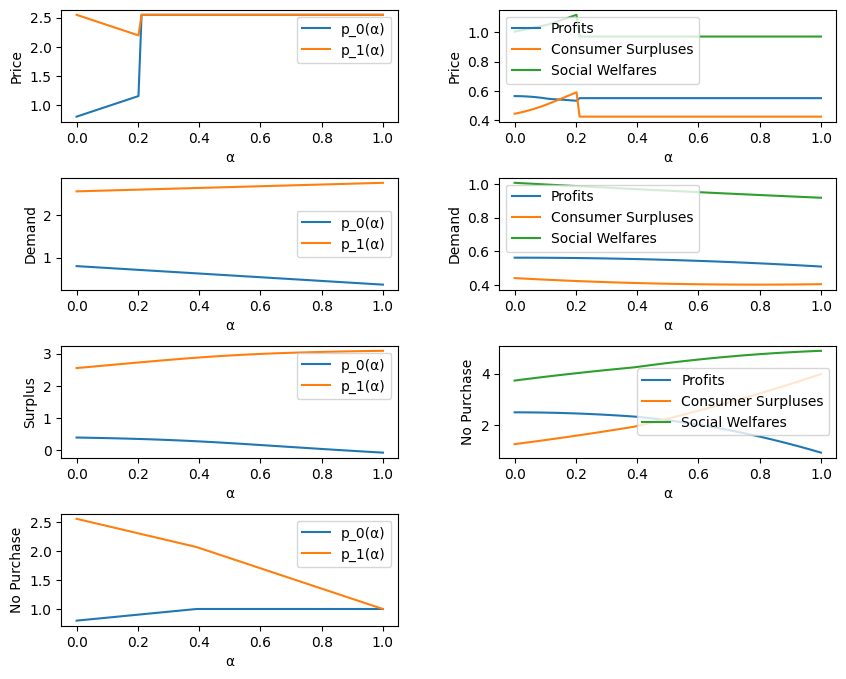

In [70]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10,8))

# Create subplots
plt.subplot(421)
plt.plot(alpha_values, price_p0_values, label='p_0(α)')
plt.plot(alpha_values, price_p1_values, label='p_1(α)')
plt.xlabel('α')
plt.ylabel('Price')
plt.legend()

plt.subplot(422)
plt.plot(alpha_values, price_profits, label='Profits')
plt.plot(alpha_values, price_consumer_surpluses, label='Consumer Surpluses')
plt.plot(alpha_values, price_social_welfares, label='Social Welfares')
plt.xlabel('α')
plt.ylabel('Price')
plt.legend()

plt.subplot(423)
plt.plot(alpha_values, demand_p0_values, label='p_0(α)')
plt.plot(alpha_values, demand_p1_values, label='p_1(α)')
plt.xlabel('α')
plt.ylabel('Demand')
plt.legend()

plt.subplot(424)
plt.plot(alpha_values, demand_profits, label='Profits')
plt.plot(alpha_values, demand_consumer_surpluses, label='Consumer Surpluses')
plt.plot(alpha_values, demand_social_welfares, label='Social Welfares')
plt.xlabel('α')
plt.ylabel('Demand')
plt.legend()

plt.subplot(425)
plt.plot(alpha_values, surplus_p0_values, label='p_0(α)')
plt.plot(alpha_values, surplus_p1_values, label='p_1(α)')
plt.xlabel('α')
plt.ylabel('Surplus')
plt.legend()

plt.subplot(427)
plt.plot(alpha_values, no_p0_values, label='p_0(α)')
plt.plot(alpha_values, no_p1_values, label='p_1(α)')
plt.xlabel('α')
plt.ylabel('No Purchase')
plt.legend()

plt.subplot(426)
plt.plot(alpha_values, no_profits, label='Profits')
plt.plot(alpha_values, no_consumer_surpluses, label='Consumer Surpluses')
plt.plot(alpha_values, no_social_welfares, label='Social Welfares')
plt.xlabel('α')
plt.ylabel('No Purchase')
plt.legend()

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Show plot
plt.show()


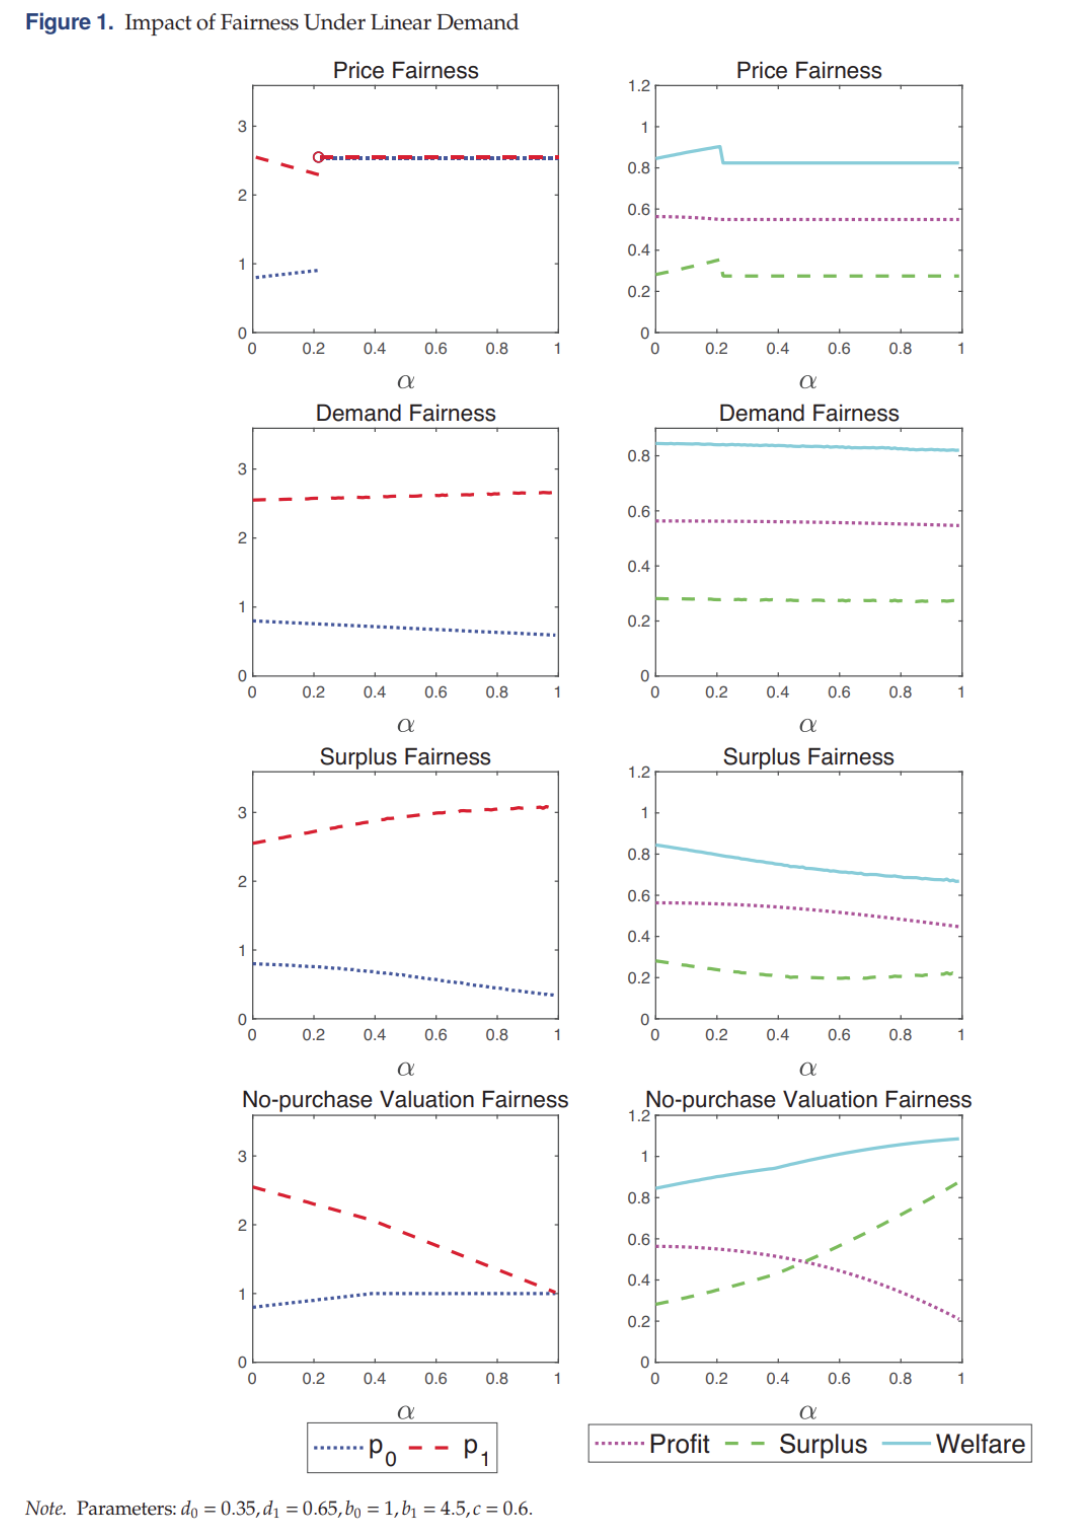